# Lab04

## Setup

In [20]:
import torch
from torch import tensor
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error

## Task

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`.

In general we're going to be faced with a dataset with an unknown and probably nonlinear relationship. But for now let's use a simple dataset with a known linear relationship:

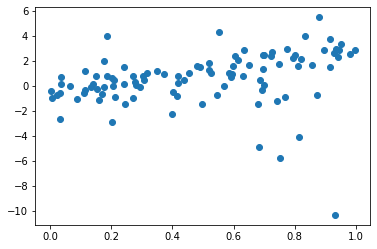

In [21]:
true_weights = 4.0
true_bias = -1.0

# Make the randomness consistent
torch.manual_seed(0)
# Use random x values
x = torch.rand(100)
# Generate random noise, same shape as *x*, that has some outliers.
noise = torch.distributions.studentT.StudentT(2.0).sample(x.shape)
# For a simpler variant, use  torch.randn_like(x).
#print(f"Noise mean: {noise.mean()}, noise variance {noise.var()}")
# Generate true y values 
y_true = true_weights * x + noise + true_bias
# Make a scatterplot. The semicolon at the end says to ignore the return value.
plt.scatter(x, y_true);

In [22]:
bias = 0.0
weights = 1.0

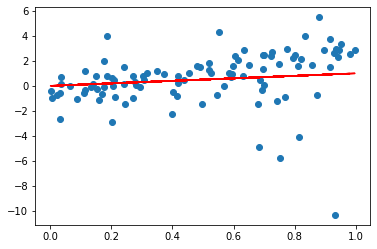

In [24]:
slope = 3.5
bias = 0.0
y_pred = weights * x + bias
plt.scatter(x, y_true); plt.plot(x, y_pred, 'r');

In [26]:
@widgets.interact(slope=(-5.0, 5.0))
def plot_linreg(slope):
    y_pred = slope * x + bias
    plt.scatter(x, y_true); plt.plot(x, y_pred, 'r');
    resid = y_true - y_pred
    mse = (resid**2).mean()
    mae = mean_absolute_error(y_true, y_pred)
    print(f"MSE: {mse}, MAE: {mae}")

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0), Output()), _dom_classes=…

- Slope that minimizes MSE: 1.40
- Slope that minimizes MAE: 2.40
- Description of the difference: The difference of the two slopes for MSE and MAE is one whole point, showing that the MSE is influenced more by the outliers.

### Gradient


In [52]:
def linreg_mse (slope):
    y_pred = slope * x + bias
    resid = y_true - y_pred
    mse = (resid**2).mean()
    return mse

eps = 1e-3
x0 = 1.4
gradient = (linreg_mse(x0 + eps) - linreg_mse(x0)) / eps
gradient

tensor(0.0024)

The numerical gradient gets closer to 0 when the slope given to the function minimizes the MSE. At

### Check for Understanding

You should now be able to answer the following questions:

1. Considering the gradient of the slope parameter with respect to the MSE: if the value of the gradient is positive, which direction do we need to move to get a lower MSE? **If the value fo the gradient is positive, we need to move to the left to get a lower MSE.**
2. If the value of the gradient is negative, which direction do we need to move to get a lower MSE? **If the value of the gradient is negative, we need to move to the right to get a lower MSE.**
3. What can we say about the gradient when the parameter minimizes the MSE? **As the parameter minimzes the MSE, the gradient gets closer to 0.**
4. What would we need to change in order to use gradient descent to minimize the MAE instead? **To use gradient descent to minimize the MAE, we would need to change the direction of movement as answered in 1. and 2.**